In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**A.2 Datos Abiertos de la CDMX**

In [3]:
df = pd.read_csv("pgj.csv")
df.head(5)

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalía,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,Geopoint
0,2016.0,Enero,2016-01-05 17:00:00,LESIONES CULPOSAS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-6,UI-1CD,GRANJAS MODERNAS,GUSTAVO A MADERO,2016-01-05 18:35:37,Enero,2016,SAN JUAN DE ARAGON,CALLE ANZAR,-99.103527,19.481076,"19.4810759998,-99.103527"
1,2017.0,Noviembre,2017-11-01 14:00:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,INVESTIGACIÓN EN AZCAPOTZALCO,AZ-1,UI-1SD,NaN,TLALNEPANTLA DE BAZ,2017-11-01 16:45:20,Noviembre,2017,BENITO JUAREZ,"MUNICIPIO DE TLALNEPANTLA, ESTADO DE MEXICO",NaN,NaN,NaN
2,2017.0,Noviembre,2017-11-01 16:40:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN IZTACALCO,IZC-2,UI-1SD,GABRIEL RAMOS MILLÁN SECCIÓN TLACOTAL,IZTACALCO,2017-11-01 16:56:04,Noviembre,2017,SUR 117,ORIENTE 100A,-99.106072,19.395398,"19.3953976727,-99.1060723829"
3,2015.0,Diciembre,2015-12-30 20:00:00,FRAUDE,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-8,UI-1CD,CONSEJO AGRARISTA MEXICANO,IZTAPALAPA,2016-01-05 21:12:42,Enero,2016,CUARTA CERRADA DE FRESNO,ENCINO (SIN REGISTRO DEL SAP),-99.055887,19.322458,"19.3224579998,-99.055887"
4,2018.0,Mayo,2018-05-16 16:00:00,ROBO A REPARTIDOR CON VIOLENCIA,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-9,UI-2SD,DESARROLLO URBANO QUETZALCOATL,IZTAPALAPA,2018-05-22 10:44:45,Mayo,2018,TARASCO,ZAPOTECO,-99.042786,19.319141,"19.3191405147,-99.0427862526"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808871 entries, 0 to 808870
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   año_hechos            808673 non-null  float64
 1   mes_hechos            808673 non-null  object 
 2   fecha_hechos          808673 non-null  object 
 3   delito                808871 non-null  object 
 4   categoria_delito      808871 non-null  object 
 5   fiscalía              808871 non-null  object 
 6   agencia               808871 non-null  object 
 7   unidad_investigacion  808646 non-null  object 
 8   colonia_hechos        776781 non-null  object 
 9   alcaldia_hechos       807860 non-null  object 
 10  fecha_inicio          808871 non-null  object 
 11  mes_inicio            808871 non-null  object 
 12  ao_inicio             808871 non-null  int64  
 13  calle_hechos          806467 non-null  object 
 14  calle_hechos2         328009 non-null  object 
 15  

**1)** Completez de datos: Lo primero que se hace es checar que no existan "missing values" en el dataframe, además de comprobar que no hayan valores repetídos.

Estar seguros de que los datos estén actualizados. En este caso en partícular no lo están porque estamos tomando datos archivados que abarcan del 2016 al 2019.

Asegurar que los datos sean correctos. Está parte es complicada porque debemos checar que la fuente de los datos sea confiable y no tenga errores.

In [5]:
#Contando NaN en el dataframe
df.isna().values.sum()

611191

In [6]:
#missing values para cada columna
df.isnull().sum()

año_hechos                 198
mes_hechos                 198
fecha_hechos               198
delito                       0
categoria_delito             0
fiscalía                     0
agencia                      0
unidad_investigacion       225
colonia_hechos           32090
alcaldia_hechos           1011
fecha_inicio                 0
mes_inicio                   0
ao_inicio                    0
calle_hechos              2404
calle_hechos2           480862
longitud                 31335
latitud                  31335
Geopoint                 31335
dtype: int64

Podemos quitar calle_hechos2 porque tiene muchos valores vacios. En lugar de esta columna podemos usar simplemente longitud latitud y geopoint porque tienen menos NaN.

In [7]:
df = df.drop(['calle_hechos2'], axis=1)
df.head(5)

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalía,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,longitud,latitud,Geopoint
0,2016.0,Enero,2016-01-05 17:00:00,LESIONES CULPOSAS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-6,UI-1CD,GRANJAS MODERNAS,GUSTAVO A MADERO,2016-01-05 18:35:37,Enero,2016,SAN JUAN DE ARAGON,-99.103527,19.481076,"19.4810759998,-99.103527"
1,2017.0,Noviembre,2017-11-01 14:00:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,INVESTIGACIÓN EN AZCAPOTZALCO,AZ-1,UI-1SD,NaN,TLALNEPANTLA DE BAZ,2017-11-01 16:45:20,Noviembre,2017,BENITO JUAREZ,NaN,NaN,NaN
2,2017.0,Noviembre,2017-11-01 16:40:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN IZTACALCO,IZC-2,UI-1SD,GABRIEL RAMOS MILLÁN SECCIÓN TLACOTAL,IZTACALCO,2017-11-01 16:56:04,Noviembre,2017,SUR 117,-99.106072,19.395398,"19.3953976727,-99.1060723829"
3,2015.0,Diciembre,2015-12-30 20:00:00,FRAUDE,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-8,UI-1CD,CONSEJO AGRARISTA MEXICANO,IZTAPALAPA,2016-01-05 21:12:42,Enero,2016,CUARTA CERRADA DE FRESNO,-99.055887,19.322458,"19.3224579998,-99.055887"
4,2018.0,Mayo,2018-05-16 16:00:00,ROBO A REPARTIDOR CON VIOLENCIA,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-9,UI-2SD,DESARROLLO URBANO QUETZALCOATL,IZTAPALAPA,2018-05-22 10:44:45,Mayo,2018,TARASCO,-99.042786,19.319141,"19.3191405147,-99.0427862526"


**Contando el número de delitos y el tiempo que abarcan**

**2)** Están registrados 808871 delitos desde 1906 al 2019

In [8]:
#Año maximo que abarca los datos
df["año_hechos"].max()

2019.0

In [9]:
#Año mínimo que abarca los datos
df["año_hechos"].min()

1906.0

**Contando el número de delitos**

**3)** Los 5 delitos más frecuentes son: Violencia familiar, robo de objetos, robo a negocios sin violencía,
    fraude y denuncia de hechos

In [10]:
#Contar el número de delitos y ordenarlos de forma descendente
df.delito.value_counts().iloc[:10]

VIOLENCIA FAMILIAR                                69517
ROBO DE OBJETOS                                   52214
ROBO A NEGOCIO SIN VIOLENCIA                      51426
FRAUDE                                            45349
DENUNCIA DE HECHOS                                44433
AMENAZAS                                          37415
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA    29254
ROBO A TRANSEUNTE DE CELULAR CON VIOLENCIA        25960
ROBO DE ACCESORIOS DE AUTO                        25447
ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO       23860
Name: delito, dtype: int64

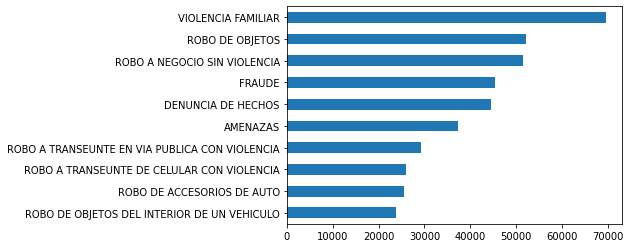

In [11]:
#Plotear los resultados para visualizar mejor
df.delito.value_counts().iloc[:10].sort_values().plot(kind= "barh")

In [12]:
#número de delitos por año
df.groupby('año_hechos').size().sort_values(ascending=False).head(10)

año_hechos
2018.0    249585
2017.0    225472
2016.0    194085
2019.0    113415
2015.0     15424
2014.0      3840
2013.0      1914
2012.0      1275
2011.0       856
2010.0       681
dtype: int64

**4) Delitos que van a la alza y a la baja**

In [29]:
df.delito.nunique()

245

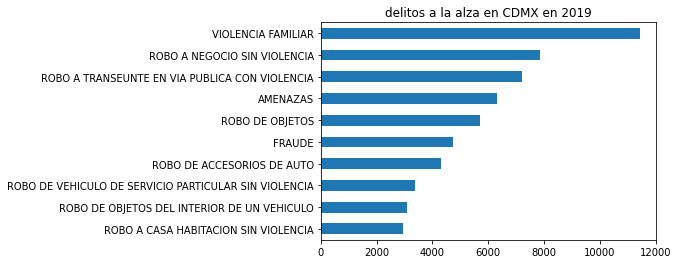

In [27]:
df = df[df['año_hechos']==2019.0]
df.delito.value_counts().iloc[:10].sort_values().plot(kind= "barh", title='delitos a la alza en CDMX en 2019')

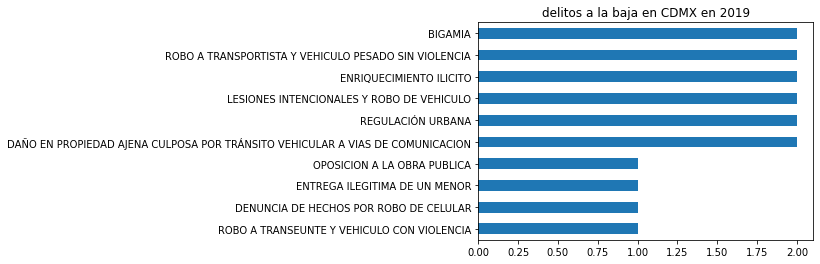

In [33]:
df.delito.value_counts().iloc[220:230].sort_values().plot(kind= "barh", title='delitos a la baja en CDMX en 2019')

**Alcaldías con más delitos**

**5)** La alcadía que mas delitos tiene es Cuauhtemoc. La que menos tienen es Milpa Alta. Cabe mencionar que sólo me estoy fijando en la CDMX (la cual, por definicón, la constituyen alcaldías).

Puede haber muchas razones que ocasionen que la delegación Cuauhtemoc tenga más delitos. Una de ellas es que simplemente se reportaron más en ese lugar en comparación con las otras alcaldías. Además, colinda con muchas alcadías que también tienen muchos delitos reportados. Coincidentemente, están todas en el norte, y son muy densas.

Por otro lado, la razón de que que Milpa Alta tenga menos delitos puede ser porque se encuentra en el sur, y es menos densa.

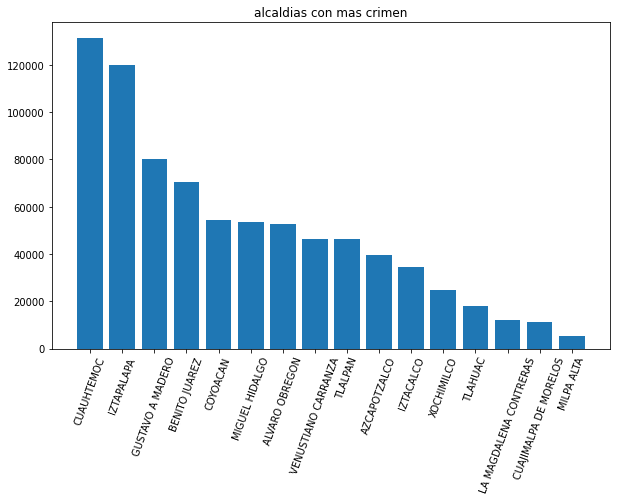

In [14]:
df = pd.read_csv("pgj.csv")
alcaldias = df.alcaldia_hechos.value_counts()[:16]
plt.figure(figsize=(10,6))

step = np.arange(len(alcaldias))
plt.bar(step, alcaldias)
plt.title("alcaldias con mas crimen")
plt.xticks(step, alcaldias.index, rotation=70)
plt.show()

**Número de delítos por meses/días**

**7)** Ocurren más delitos en Invierno y Primavera. Siendo Mayo el mes donde se reportaron más delitos, y Julio el més donde se reportaron menos.

Por otro lado, los días 1 y 15 de cada més es dónde se reportan más delitos

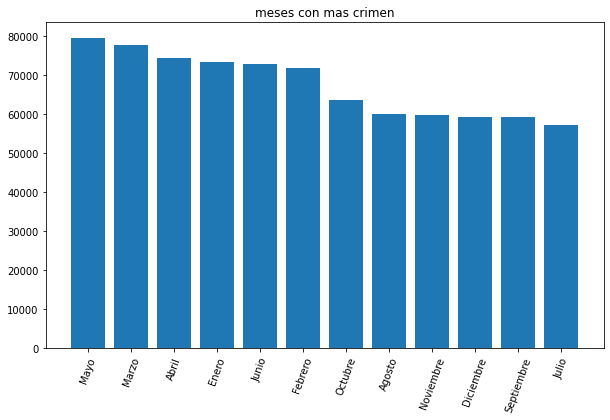

In [15]:
meses = df.mes_hechos.value_counts()
plt.figure(figsize=(10,6))

step = np.arange(len(meses))
plt.bar(step, meses)
plt.title("meses con mas crimen")
plt.xticks(step, meses.index, rotation=70)
plt.show()

In [16]:
#parsing object to datetime
df['fecha_hechos'] = pd.to_datetime(df['fecha_hechos'], format= '%Y/%m/%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808871 entries, 0 to 808870
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   año_hechos            808673 non-null  float64       
 1   mes_hechos            808673 non-null  object        
 2   fecha_hechos          808673 non-null  datetime64[ns]
 3   delito                808871 non-null  object        
 4   categoria_delito      808871 non-null  object        
 5   fiscalía              808871 non-null  object        
 6   agencia               808871 non-null  object        
 7   unidad_investigacion  808646 non-null  object        
 8   colonia_hechos        776781 non-null  object        
 9   alcaldia_hechos       807860 non-null  object        
 10  fecha_inicio          808871 non-null  object        
 11  mes_inicio            808871 non-null  object        
 12  ao_inicio             808871 non-null  int64         
 13 

In [17]:
#adding day column
df['dia'] = df.fecha_hechos.dt.day
df.sample(1)

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalía,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,Geopoint,dia
225925,2019.0,Abril,2019-04-30 08:30:00,LESIONES INTENCIONALES POR GOLPES,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN MILPA ALTA,MIL-1,UI-2CD,SANTA CRUZ (VILLA MILPA ALTA),MILPA ALTA,2019-05-02 21:09:54,Mayo,2019,BOULEVARD NUEVO LEON 356,NaN,-99.019557,19.19642,"19.1964202991,-99.0195567998",30.0


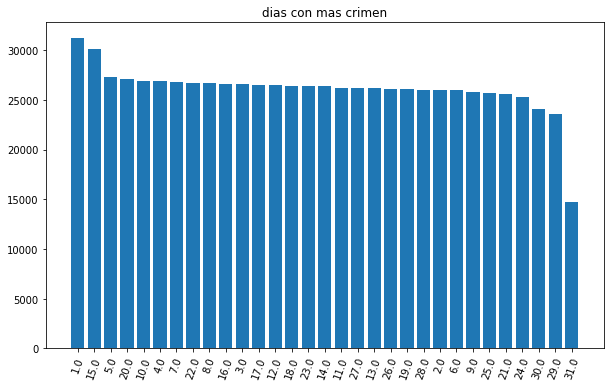

In [18]:
dias = df.dia.value_counts()
plt.figure(figsize=(10,6))

step = np.arange(len(dias))
plt.bar(step, dias)
plt.title("dias con mas crimen")
plt.xticks(step, dias.index, rotation=70)
plt.show()

**Delito mas recurrente por dia**

In [25]:
df.groupby(["dia","delito"]).size().sort_values(ascending=False).unstack(0).head(5)

dia,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0
delito,,,,,,,,,,,,,,,,,,,,,
ABANDONO DE PERSONA,487.0,77.0,67.0,82.0,193.0,74.0,78.0,70.0,57.0,73.0,...,78.0,84.0,71.0,75.0,81.0,91.0,60.0,72.0,87.0,52.0
ABORTO,20.0,15.0,14.0,9.0,13.0,9.0,17.0,10.0,15.0,16.0,...,13.0,3.0,12.0,19.0,14.0,16.0,10.0,17.0,9.0,2.0
ABUSO DE AUTORIDAD,170.0,172.0,186.0,164.0,196.0,171.0,176.0,196.0,189.0,183.0,...,152.0,190.0,184.0,147.0,180.0,201.0,163.0,142.0,148.0,83.0
ABUSO DE CONFIANZA,682.0,443.0,422.0,395.0,450.0,382.0,399.0,444.0,388.0,488.0,...,412.0,419.0,338.0,366.0,360.0,350.0,439.0,367.0,439.0,221.0
ABUSO SEXUAL,477.0,257.0,270.0,221.0,266.0,239.0,298.0,272.0,284.0,257.0,...,232.0,248.0,246.0,248.0,240.0,281.0,248.0,214.0,245.0,118.0


**Colonias con más delito dentro de cada alcaldía**


**6)** Por ejemplo en la alcaldia Cuauhtemoc las tres delegaciones con más crímenes son: Centro, Doctores, Roma Norte

   En la Benito Juarez es: Del Valle Centro, Narvarte, y Portales sur.

In [26]:
df.groupby(["alcaldia_hechos","colonia_hechos"]).size().sort_values(ascending=False, na_position='last').unstack(0).head(5)

alcaldia_hechos,CUAUHTEMOC,BENITO JUAREZ,MIGUEL HIDALGO,IZTACALCO,IZTAPALAPA,VENUSTIANO CARRANZA,COYOACAN,GUSTAVO A MADERO,TLALPAN,AZCAPOTZALCO,...,TLAHUAC,MILPA ALTA,NAUCALPAN DE JUAREZ,ECATEPEC DE MORELOS,CUERNAVACA,HERMOSILLO,NEZAHUALCOYOTL,OAXACA DE JUAREZ,SAN JUAN GUICHICOVI,ZITACUARO
colonia_hechos,,,,,,,,,,,,,,,,,,,,,
CENTRO,28751.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DOCTORES,16657.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DEL VALLE CENTRO,NaN,12644.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ROMA NORTE,10403.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NARVARTE,NaN,9317.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


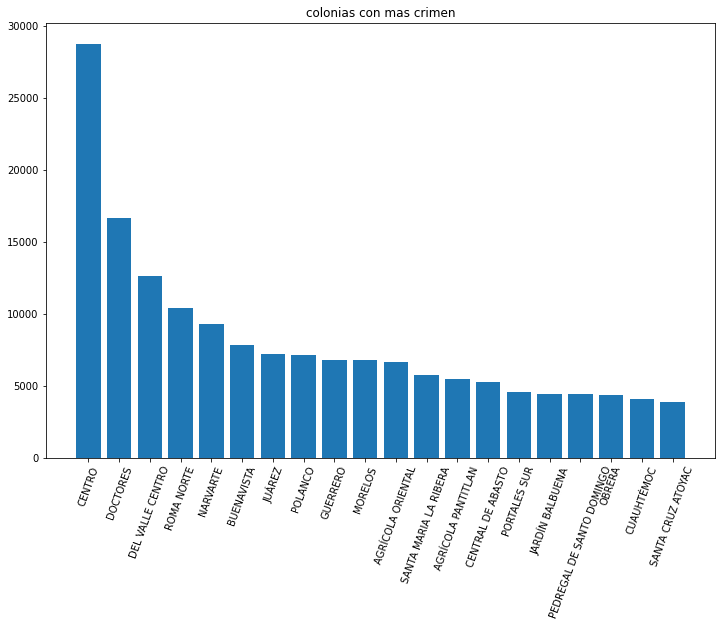

In [21]:
colonias = df.colonia_hechos.value_counts()[:20]
plt.figure(figsize=(12,8))

step = np.arange(len(colonias))
plt.bar(step, colonias)
plt.title("colonias con mas crimen")
plt.xticks(step, colonias.index, rotation=70)
plt.show()

**10)** La manera en que diseñaría un indicador que midiera el indice de inseguridad sería fijandome en el AGEB y dibujaría un mapa
que indicara las zonas con más "inseguridad" con diferente color. Sin embargo, inseguridad es una palabra muy general. Me parece que
sería más útil ilustrar en que zonas suceden con mayor frecuencia cierto tipo de delitos.
Más aún, podríamos entrenar algún multiclasificador y predecir en que zonas se esperan más delitos.